###  Created by Luis Alejandro (alejand@umich.edu)
Explores the tfrecord files and shows some recovered features.

In [1]:
import tensorflow as tf
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
# Creates dataset reading tfrecord file
filenames = ['exports/2020-02-03 11-55-25/train.tfrecord']
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [4]:
feature_description = {
    'spec': tf.io.FixedLenSequenceFeature([], tf.float32,allow_missing=True,default_value=[0.0]),
    'label': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'measurement': tf.io.FixedLenFeature([],tf.string, default_value=''),
    'array': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'sensor': tf.io.FixedLenFeature([], tf.string, default_value='')
}

def parse_observation(example):
    return tf.io.parse_single_example(example, feature_description)

In [5]:
dataset = raw_dataset.map(parse_observation,num_parallel_calls=AUTOTUNE).shuffle(128).prefetch(AUTOTUNE)
dataset

<PrefetchDataset shapes: {array: (), label: (), measurement: (), sensor: (), spec: (None,)}, types: {array: tf.string, label: tf.string, measurement: tf.string, sensor: tf.string, spec: tf.float32}>

In [6]:
for observation in dataset.take(10):
    print(observation['label'].numpy(), 
          tf.reshape(observation['spec'],(128,-1)).shape,
          observation['measurement'].numpy(),
          observation['array'].numpy(), 
          observation['sensor'].numpy())

b'Boeing' (128, 401) b'87' b'3' b'3'
b'Airbus' (128, 401) b'6' b'1' b'4'
b'Airbus' (128, 401) b'12' b'1' b'1'
b'Airbus' (128, 401) b'23' b'1' b'3'
b'Boeing' (128, 401) b'66' b'2' b'4'
b'Boeing' (128, 401) b'20' b'2' b'1'
b'Boeing' (128, 401) b'156' b'3' b'1'
b'Boeing' (128, 401) b'134' b'2' b'4'
b'Boeing' (128, 401) b'20' b'3' b'4'
b'Airbus' (128, 401) b'95' b'3' b'1'


In [7]:
def explore_dataset(dataset,n=3):
    # Subplots cap
    n = min(n,6)
    # Creates subplots and configures figure
    fig, axes = plt.subplots(2,n)
    fig.set_size_inches(4*n,6)
    fig.set_tight_layout(tight=0.1)
    # Plots features
    axes = [(axes[0,i],axes[1,i]) for i in range(n)]
    for (top_ax, bot_ax), observation in zip(axes,dataset.take(n)):
        spec = observation['spec'].numpy().reshape(128,-1)
        top_ax.pcolormesh(20*np.log10(spec),cmap='viridis')
        top_ax.set_title('{} (m{}a{}s{})'.format(
            observation['label'].numpy().decode(),
            observation['measurement'].numpy().decode(),
            observation['array'].numpy().decode(),
            observation['sensor'].numpy().decode()
        ))
        bot_ax.pcolormesh(spec,cmap='viridis')
        

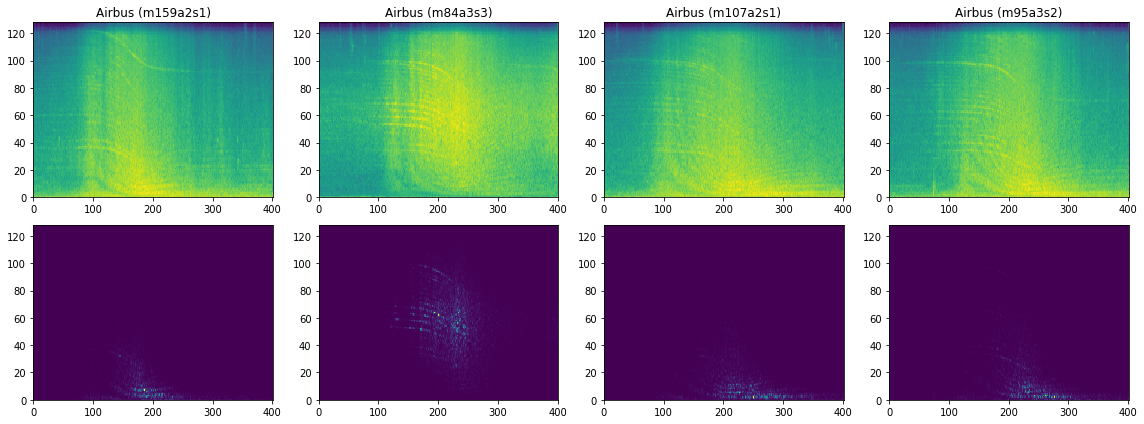

In [8]:
explore_dataset(dataset,4)